# Movie Metadata Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image 
import pydotplus
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Populating the interactive namespace from numpy and matplotlib


# Cleaning

In [4]:
df = pd.read_csv("movies.csv")

In [5]:
df.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [6]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Drop Unecessary Columns

In [7]:
df.drop(columns=['overview','spoken_languages','tagline','belongs_to_collection',\
                    'homepage','id','imdb_id','poster_path','video'],inplace=True)

Let's start cleaning. We need to clean 'genres', 'production_companies', and 'production_countries'.

Clean 'genres'. Remove special characters and numbers. Numbers have no meaning, it's just for identification.

In [8]:
df['genres'] = df['genres'].str.replace(r'\W'," ")
df['genres'] = df['genres'].str.replace('\d+',"")
df['genres'].head(5)

0       id      name    Animation      id      name...
1       id      name    Adventure      id      name...
2       id      name    Romance      id      name  ...
3       id      name    Comedy      id      name   ...
4                            id      name    Comedy   
Name: genres, dtype: object

We also want to remove the words 'id' and 'name' as those are not needed when looking for genres.

In [9]:
uselesswords = ['id' , 'name']
f = lambda x:([item for item in x.split()\
               if item not in uselesswords])

In [10]:
df["Genres2"] = df["genres"].apply(f)

Clean up 'production_countries'. Many cells have multiple countries. We will use only the first one as it seems most relevant.

In [11]:
df['production_countries'].fillna("Unknown",inplace=True)

In [12]:
df['production_countries2'] = df['production_countries'].apply(lambda x: x.split(':')[-1])

In [13]:
df['production_countries3'] = df['production_countries2'].apply(lambda x : x[:-2])

In [14]:
df['production_countries3'] = df['production_countries3'].str.replace(r"[^a-zA-Z\d\_]+", "") 
df['production_countries3'] = df['production_countries3'].str.replace(r"([A-Z])", r" \1").str.strip()
df.replace('United Statesof America','USA',inplace=True)

Clean up "production_companies. Same as production_countries. We only want the first production company

In [15]:
df['production_companies'].fillna("Unknown",inplace=True)

In [16]:
df['production_companies_first'] = df['production_companies'].apply(lambda x: x.split(',')[0])

In [17]:
df['production_companies_first'] = df['production_companies_first'].apply(lambda x: x.split(':')[-1])

In [18]:
df['production_companies_first'] = df['production_companies_first'].str.replace(r"[^a-zA-Z\d\_]+", "") 
df['production_companies_first'] = df['production_companies_first'].str.replace(r"([A-Z])", r" \1").str.strip()

Check to see if production countries, production companies and languages have been cleaned up.

In [19]:
df.head()

,adult,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,Genres2,production_countries2,production_countries3,production_companies_first
0,False,30000000,id name Animation id name...,en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/1995,373554033.0,81.0,Released,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",'United States of America'}],USA,Pixar Animation Studios
1,False,65000000,id name Adventure id name...,en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/1995,262797249.0,104.0,Released,Jumanji,6.9,2413.0,"[Adventure, Fantasy, Family]",'United States of America'}],USA,Tri Star Pictures
2,False,0,id name Romance id name ...,en,Grumpier Old Men,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,"[Romance, Comedy]",'United States of America'}],USA,Warner Bros
3,False,16000000,id name Comedy id name ...,en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,"[Comedy, Drama, Romance]",'United States of America'}],USA,Twentieth Century Fox Film Corporation
4,False,0,id name Comedy,en,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/1995,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,[Comedy],'United States of America'}],USA,Sandollar Productions


Drop all the columns created.

In [20]:
df.drop(['genres','production_companies','production_countries',\
         'production_countries2'], axis=1, inplace=True)

In [21]:
df.rename(columns={'Genres2':'genres', 'production_countries3':'production_country',\
                   'production_companies_first':'production_company'}, inplace=True)

In [22]:
df.head(1)

,adult,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,genres,production_country,production_company
0,False,30000000,en,Toy Story,21.946943,10/30/1995,373554033.0,81.0,Released,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",USA,Pixar Animation Studios


Fill out rest of columns with no value. Fill with 'Unknown'

In [23]:
df.dropna(how='any',subset=['revenue'],inplace=True)

In [24]:
df.isna().any()

adult                 False
budget                False
original_language      True
original_title        False
popularity            False
release_date           True
revenue               False
runtime                True
status                 True
title                 False
vote_average          False
vote_count            False
genres                False
production_country    False
production_company    False
dtype: bool

In [25]:
df.shape

(45460, 15)

## We will save the cleaned movie file to a new csv. From here we will start the analysis

In [26]:
df.to_csv('movies_cleaned2.csv')

In [27]:
df = pd.read_csv("movies_cleaned2.csv")

In [28]:
df2=df.copy()

In [29]:
type(df2['genres'])

pandas.core.series.Series

In [30]:
df2['genres_1'] = df2['genres'].apply(lambda x: x.split(',')[0])

In [31]:
df2['genres_1'] = df2['genres_1'].apply(lambda x: x.split(':')[-1])

In [32]:
df2.drop(['genres'], axis=1, inplace=True)
df2.rename(columns={'genres_1':'genres'}, inplace = True)

In [33]:
df2['genres'] = df2['genres'].str.replace(r"[^a-zA-Z\d\_]+", "") 
df2['genres'] = df2['genres'].str.replace(r"([A-Z])", r" \1").str.strip()

In [34]:
df2.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [35]:
df2.head(5)

,adult,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,production_country,production_company,genres
0,False,30000000,en,Toy Story,21.946943,10/30/1995,373554033.0,81.0,Released,Toy Story,7.7,5415.0,USA,Pixar Animation Studios,Animation
1,False,65000000,en,Jumanji,17.015539,12/15/1995,262797249.0,104.0,Released,Jumanji,6.9,2413.0,USA,Tri Star Pictures,Adventure
2,False,0,en,Grumpier Old Men,11.712900,12/22/1995,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,USA,Warner Bros,Romance
3,False,16000000,en,Waiting to Exhale,3.859495,12/22/1995,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,USA,Twentieth Century Fox Film Corporation,Comedy
4,False,0,en,Father of the Bride Part II,8.387519,2/10/1995,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,USA,Sandollar Productions,Comedy


In [36]:
df2['vote_average'] = pd.to_numeric(df2['vote_average'])
df2['vote_count'] = pd.to_numeric(df2['vote_count'])

#### The mean rating for all the movies is approx 5.6 on a scale of 10.

In [37]:
meanrating = df2.vote_average.mean()
meanrating

5.618207215133889

#### Graphical representation -  Half the movies have a rating of less than or equal to 6

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

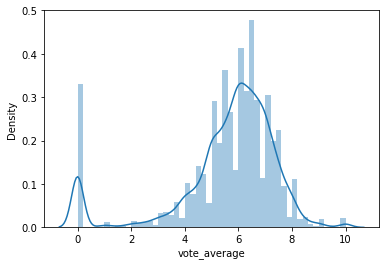

In [38]:
sns.distplot(df2['vote_average'].fillna(df2['vote_average'].mean()))

<AxesSubplot:xlabel='budget', ylabel='Density'>

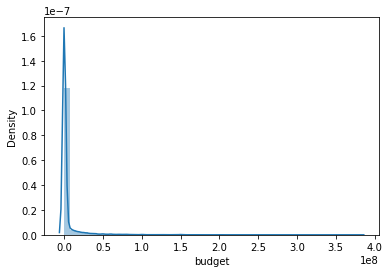

In [39]:
sns.distplot(df2[df2['budget'].notnull()]['budget'])

#### More than 75% of the movies have a budget smaller than 25 million dollars.

<AxesSubplot:xlabel='revenue', ylabel='Density'>

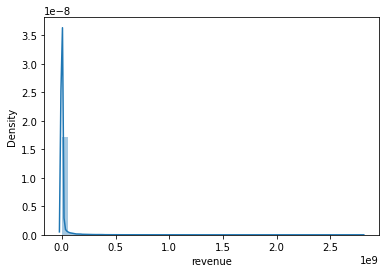

In [40]:
sns.distplot(df2[df2['revenue'].notnull()]['revenue'])

#### It's also decreasing as budget

In [41]:
minvotes= df2['vote_count'].quantile(0.95)
minvotes

434.0

#### For a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

In [42]:
qualified = df2.loc[df2['vote_count'] >= minvotes]
qualified.shape

(2274, 15)

#### We see that there are 2274 movies which qualify to be in this list

In [43]:
df2['revenue'] = pd.to_numeric(df2['revenue'], errors='coerce')
df2['budget'] = pd.to_numeric(df2['budget'], errors='coerce')

#### Calculating profit based on revenue and budget

In [44]:
df2['Profit'] = df2['revenue'] - df2['budget']

In [45]:
df2.head()

,adult,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,production_country,production_company,genres,Profit
0,False,30000000,en,Toy Story,21.946943,10/30/1995,373554033.0,81.0,Released,Toy Story,7.7,5415.0,USA,Pixar Animation Studios,Animation,343554033.0
1,False,65000000,en,Jumanji,17.015539,12/15/1995,262797249.0,104.0,Released,Jumanji,6.9,2413.0,USA,Tri Star Pictures,Adventure,197797249.0
2,False,0,en,Grumpier Old Men,11.712900,12/22/1995,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,USA,Warner Bros,Romance,0.0
3,False,16000000,en,Waiting to Exhale,3.859495,12/22/1995,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,USA,Twentieth Century Fox Film Corporation,Comedy,65452156.0
4,False,0,en,Father of the Bride Part II,8.387519,2/10/1995,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,USA,Sandollar Productions,Comedy,76578911.0


In [46]:
df2[["popularity", "revenue", "budget", "runtime", "vote_average", "vote_count", "Profit"]].describe()

,popularity,revenue,budget,runtime,vote_average,vote_count,Profit
count,45460.000000,4.546000e+04,4.546000e+04,45203.000000,45460.000000,45460.000000,4.546000e+04
mean,2.921478,1.120935e+07,4.224858e+06,94.128199,5.618207,109.897338,6.984491e+06
std,6.005414,6.433225e+07,1.742467e+07,38.407810,1.924216,491.310374,5.214125e+07
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08
25%,0.385948,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00
50%,1.127685,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000,0.000000e+00
75%,3.678902,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000,0.000000e+00
max,547.488298,2.787965e+09,3.800000e+08,1256.000000,10.000000,14075.000000,2.550965e+09


### Since difference between min and max values for budget, revenue and profit is not so small, we have normalized these. In order to preserve the signs of the parameters, the formula of normalization is applied as:

### value / (max - min)

In [47]:
min_val = df2["budget"].min()
max_val = df2["budget"].max()
df2[["budget", "revenue", "Profit"]] = df2[["budget", "revenue", "Profit"]].apply(lambda x: 
                                                            x / (max_val - min_val))

#### We are defining a function, weighted_rating() to check which are the most trending movies by their rating

In [48]:
def weighted_rating(data):
    v = data['vote_count'] + 1 # added +1
    R = data['vote_average']
    return (v / (v + minvotes) * R) + (minvotes / (minvotes + v) * meanrating)

df2['weighted_rating'] = df2.apply(weighted_rating, axis=1)
df2

,adult,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,production_country,production_company,genres,Profit,weighted_rating
0,False,0.078947,en,Toy Story,21.946943,10/30/1995,0.983037,81.0,Released,Toy Story,7.7,5415.0,USA,Pixar Animation Studios,Animation,0.904090,7.545556
1,False,0.171053,en,Jumanji,17.015539,12/15/1995,0.691572,104.0,Released,Jumanji,6.9,2413.0,USA,Tri Star Pictures,Adventure,0.520519,6.704671
2,False,0.000000,en,Grumpier Old Men,11.712900,12/22/1995,0.000000,101.0,Released,Grumpier Old Men,6.5,92.0,USA,Warner Bros,Romance,0.000000,5.773818
3,False,0.042105,en,Waiting to Exhale,3.859495,12/22/1995,0.214348,127.0,Released,Waiting to Exhale,6.1,34.0,USA,Twentieth Century Fox Film Corporation,Comedy,0.172243,5.654162
4,False,0.000000,en,Father of the Bride Part II,8.387519,2/10/1995,0.201523,106.0,Released,Father of the Bride Part II,5.7,173.0,USA,Sandollar Productions,Comedy,0.201523,5.641615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45455,False,0.000000,fa,رگ خواب,0.072051,NaN,0.000000,90.0,Released,Subdue,4.0,1.0,Iran,NaN,Drama,0.000000,5.610784
45456,False,0.000000,tl,Siglo ng Pagluluwal,0.178241,11/17/2011,0.000000,360.0,Released,Century of Birthing,9.0,3.0,Philippines,Sine Olivia,Drama,0.000000,5.649091
45457,False,0.000000,en,Betrayal,0.903007,8/1/2003,0.000000,90.0,Released,Betrayal,3.8,6.0,USA,American World Pictures,Action,0.000000,5.589347
45458,False,0.000000,en,Satana likuyushchiy,0.003503,10/21/1917,0.000000,87.0,Released,Satan Triumphant,0.0,0.0,Russia,Yermoliev,,0.000000,5.605292


#### Sorting values based on weighted_rating

In [49]:
df2.sort_values('weighted_rating', ascending=False)[["title", "production_country", "genres", "Profit", 
                                                    "popularity", "weighted_rating"]].head(10)

,title,production_country,genres,Profit,popularity,weighted_rating
314,The Shawshank Redemption,USA,Drama,0.008793,51.645403,8.357762
834,The Godfather,USA,Drama,0.629122,41.109264,8.306364
12481,The Dark Knight,USA,Drama,2.156733,123.167259,8.208383
2843,Fight Club,USA,Drama,0.099615,63.869599,8.184911
292,Pulp Fiction,USA,Thriller,0.541918,140.950236,8.172169
351,Forrest Gump,USA,Comedy,1.639330,48.307194,8.069436
522,Schindler's List,USA,Drama,0.787804,41.725123,8.061056
23671,Whiplash,USA,Drama,0.025768,64.299990,8.058076
5481,Spirited Away,Japan,Fantasy,0.684013,41.048867,8.035658
1154,The Empire Strikes Back,USA,Adventure,1.369474,19.470959,8.025820


#### Sorting values based on Profit

In [50]:
df2.sort_values('Profit', ascending=False)[["title", "production_country", "genres", "Profit", 
                                                    "popularity", "weighted_rating"]].head(10)

,title,production_country,genres,Profit,popularity,weighted_rating
14551,Avatar,United Kingdom,Action,6.713066,185.070892,7.145295
26553,Star Wars: The Force Awakens,USA,Action,4.797957,31.626013,7.403097
1639,Titanic,USA,Drama,4.329037,26.889070,7.400463
25082,Jurassic World,USA,Action,3.588234,32.790475,6.458748
28828,Furious 7,USA,Action,3.463814,27.275687,7.144305
17818,The Avengers,USA,Science,3.419889,89.887648,7.337813
17437,Harry Potter and the Deathly Hallows: Part 2,USA,Family,3.202632,24.990737,7.749407
26556,Avengers: Age of Ultron,USA,Action,2.961589,37.379420,7.200599
22108,Frozen,USA,Animation,2.958471,24.248243,7.175762
42216,Beauty and the Beast,USA,Family,2.902332,287.253654,6.714015


#### Heatmap of correlations to find which numerical features influence the Profit feature most.


<AxesSubplot:>

,adult,budget,popularity,runtime,vote_average,vote_count,Profit,weighted_rating
adult,1.000000,-0.003345,-0.003392,-0.009029,-0.012403,-0.002922,-0.001907,-0.005346
budget,-0.003345,1.000000,0.449645,0.134733,0.073494,0.676642,0.614339,0.382321
popularity,-0.003392,0.449645,1.000000,0.129927,0.154399,0.559965,0.474264,0.463614
runtime,-0.009029,0.134733,0.129927,1.000000,0.158146,0.113539,0.083189,0.157327
vote_average,-0.012403,0.073494,0.154399,0.158146,1.000000,0.123607,0.078916,0.305796
vote_count,-0.002922,0.676642,0.559965,0.113539,0.123607,1.000000,0.775756,0.694526
Profit,-0.001907,0.614339,0.474264,0.083189,0.078916,0.775756,1.000000,0.475858
weighted_rating,-0.005346,0.382321,0.463614,0.157327,0.305796,0.694526,0.475858,1.000000


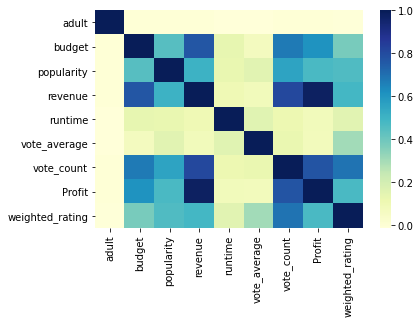

In [51]:
sns.heatmap(df2.corr(), cmap = 'YlGnBu')
df2.drop(["revenue"], axis=1).corr()

#### Correlation

In [52]:
df2.corr()

,adult,budget,popularity,revenue,runtime,vote_average,vote_count,Profit,weighted_rating
adult,1.000000,-0.003345,-0.003392,-0.002452,-0.009029,-0.012403,-0.002922,-0.001907,-0.005346
budget,-0.003345,1.000000,0.449645,0.768776,0.134733,0.073494,0.676642,0.614339,0.382321
popularity,-0.003392,0.449645,1.000000,0.506179,0.129927,0.154399,0.559965,0.474264,0.463614
revenue,-0.002452,0.768776,0.506179,1.000000,0.103917,0.083868,0.812022,0.976896,0.489236
runtime,-0.009029,0.134733,0.129927,0.103917,1.000000,0.158146,0.113539,0.083189,0.157327
vote_average,-0.012403,0.073494,0.154399,0.083868,0.158146,1.000000,0.123607,0.078916,0.305796
vote_count,-0.002922,0.676642,0.559965,0.812022,0.113539,0.123607,1.000000,0.775756,0.694526
Profit,-0.001907,0.614339,0.474264,0.976896,0.083189,0.078916,0.775756,1.000000,0.475858
weighted_rating,-0.005346,0.382321,0.463614,0.489236,0.157327,0.305796,0.694526,0.475858,1.000000


#### we need to "stack" the result of cor.stack(), which means turning it into a Series with a "Hierarchical index" (that is, an index of two elements). Check relationship within different properties

In [53]:
cor = df2.corr()
cor.stack()

adult            adult              1.000000
                 budget            -0.003345
                 popularity        -0.003392
                 revenue           -0.002452
                 runtime           -0.009029
                                      ...   
weighted_rating  runtime            0.157327
                 vote_average       0.305796
                 vote_count         0.694526
                 Profit             0.475858
                 weighted_rating    1.000000
Length: 81, dtype: float64

In [54]:
cor[cor < 1].stack().nlargest(10)

revenue          Profit             0.976896
Profit           revenue            0.976896
revenue          vote_count         0.812022
vote_count       revenue            0.812022
                 Profit             0.775756
Profit           vote_count         0.775756
budget           revenue            0.768776
revenue          budget             0.768776
vote_count       weighted_rating    0.694526
weighted_rating  vote_count         0.694526
dtype: float64

#### We can see that profit and revenue are highly correlated, let's remove the correlations equal to 1 and pick one correlation every two (as they are appearing twice

In [55]:
cor[cor < 1].stack().nlargest(20)[::2]

revenue     Profit             0.976896
            vote_count         0.812022
vote_count  Profit             0.775756
budget      revenue            0.768776
vote_count  weighted_rating    0.694526
budget      vote_count         0.676642
            Profit             0.614339
popularity  vote_count         0.559965
            revenue            0.506179
revenue     weighted_rating    0.489236
dtype: float64

In [56]:
cor[cor < 1].stack().nsmallest(20)[::2]

adult         vote_average      -0.012403
              runtime           -0.009029
              weighted_rating   -0.005346
              popularity        -0.003392
              budget            -0.003345
              vote_count        -0.002922
              revenue           -0.002452
              Profit            -0.001907
budget        vote_average       0.073494
vote_average  Profit             0.078916
dtype: float64

In [57]:
cor[cor<1].stack().abs().nsmallest(20)[::2]

adult         Profit             0.001907
              revenue            0.002452
              vote_count         0.002922
              budget             0.003345
              popularity         0.003392
              weighted_rating    0.005346
              runtime            0.009029
              vote_average       0.012403
budget        vote_average       0.073494
vote_average  Profit             0.078916
dtype: float64

#### Least significant correlations

In [58]:
LeastCorr = cor[cor<1].stack().abs().nsmallest(20)[::2]

In [59]:
cor[cor<1].stack()[LeastCorr.index]

adult         Profit            -0.001907
              revenue           -0.002452
              vote_count        -0.002922
              budget            -0.003345
              popularity        -0.003392
              weighted_rating   -0.005346
              runtime           -0.009029
              vote_average      -0.012403
budget        vote_average       0.073494
vote_average  Profit             0.078916
dtype: float64

#### Below are the scatterplots of numeric data just for the data visualization
#### Scatterplot of vote count and profit,for it to be credible, it needs a significant amount of votes. 

<AxesSubplot:xlabel='vote_count', ylabel='Profit'>

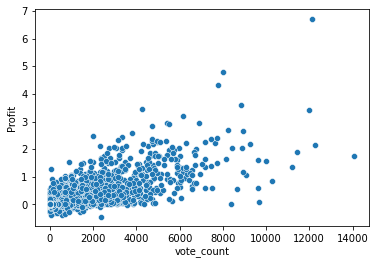

In [60]:
sns.scatterplot(x="vote_count", y="Profit", data=df2[["Profit", "vote_count"]])

<AxesSubplot:xlabel='budget', ylabel='revenue'>

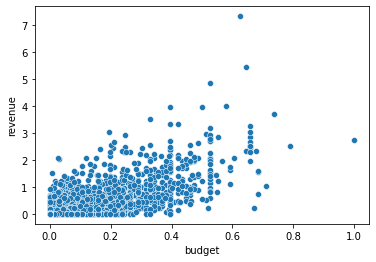

In [61]:
sns.scatterplot(x="budget", y="revenue", data=df2[["budget", "revenue"]])

<AxesSubplot:xlabel='vote_average'>

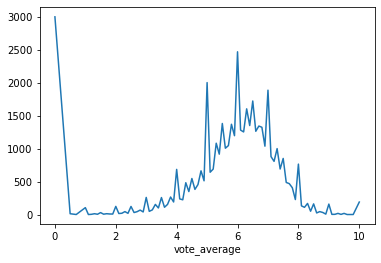

In [62]:
df2.groupby('vote_average')['vote_average'].count().plot()

#### The more revenue a movie has, the more profit the movie will have 

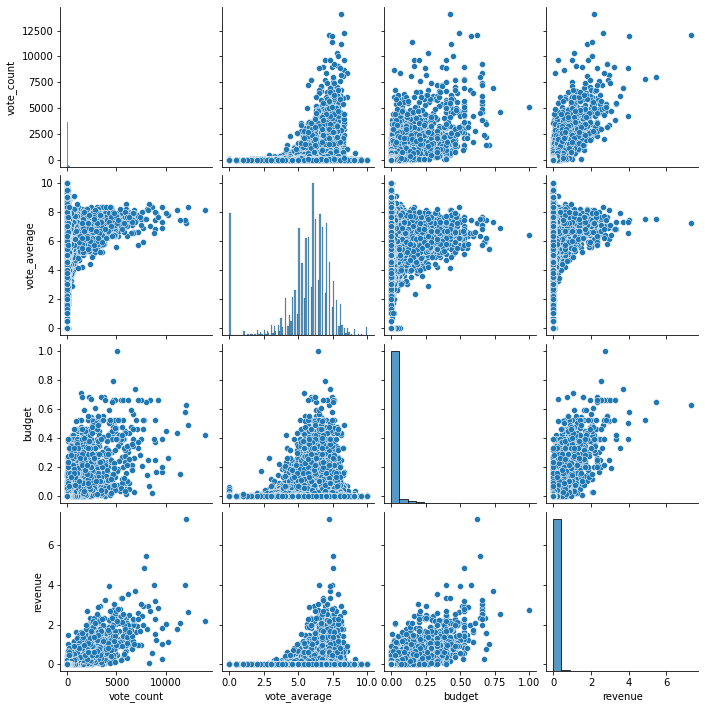

In [63]:
sns.pairplot(df2[['vote_count','vote_average', 'budget', 'revenue']])

<AxesSubplot:>

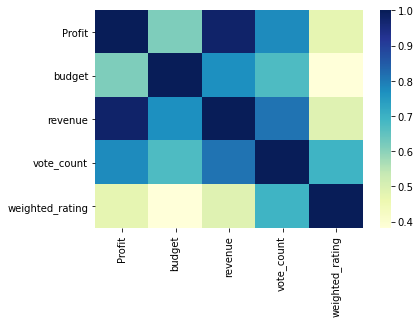

In [64]:
sns.heatmap(df2[["Profit", "budget", "revenue", "vote_count", "weighted_rating"]].corr(), 
            cmap = 'YlGnBu')

#### Converting Profit into a binary variable

In [65]:
df2[df2['Profit'] > 0 ]

,adult,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,production_country,production_company,genres,Profit,weighted_rating
0,False,0.078947,en,Toy Story,21.946943,10/30/1995,0.983037,81.0,Released,Toy Story,7.7,5415.0,USA,Pixar Animation Studios,Animation,0.904090,7.545556
1,False,0.171053,en,Jumanji,17.015539,12/15/1995,0.691572,104.0,Released,Jumanji,6.9,2413.0,USA,Tri Star Pictures,Adventure,0.520519,6.704671
3,False,0.042105,en,Waiting to Exhale,3.859495,12/22/1995,0.214348,127.0,Released,Waiting to Exhale,6.1,34.0,USA,Twentieth Century Fox Film Corporation,Comedy,0.172243,5.654162
4,False,0.000000,en,Father of the Bride Part II,8.387519,2/10/1995,0.201523,106.0,Released,Father of the Bride Part II,5.7,173.0,USA,Sandollar Productions,Comedy,0.201523,5.641615
5,False,0.157895,en,Heat,17.924927,12/15/1995,0.493255,170.0,Released,Heat,7.7,1886.0,USA,Regency Enterprises,Action,0.335360,7.310729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45244,False,0.031579,ta,சிவாஜி,1.323587,6/14/2007,0.050000,185.0,Released,Sivaji: The Boss,6.9,25.0,India,A V M Productions,Action,0.018421,5.690656
45259,False,0.000000,sv,Turist,12.165685,8/15/2014,0.003578,118.0,Released,Force Majeure,6.8,255.0,France,Motlys,Comedy,0.003578,6.056669
45375,False,0.000000,ru,Vladeniye 18,0.217441,3/13/2014,0.000843,90.0,Released,Apartment 18,4.4,4.0,Russia,Lyuksor,Horror,0.000843,5.604332
45395,False,0.000000,ru,Чудо,0.436028,10/9/2009,0.000133,110.0,Released,The Miracle,6.3,3.0,Russia,Central Partnership,Drama,0.000133,5.624434


In [66]:
df2[df2['Profit'] <= 0 ]

,adult,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,production_country,production_company,genres,Profit,weighted_rating
2,False,0.000000,en,Grumpier Old Men,11.712900,12/22/1995,0.000000,101.0,Released,Grumpier Old Men,6.5,92.0,USA,Warner Bros,Romance,0.000000,5.773818
6,False,0.152632,en,Sabrina,6.677277,12/15/1995,0.000000,127.0,Released,Sabrina,6.2,141.0,USA,Paramount Pictures,Comedy,-0.152632,5.761635
7,False,0.000000,en,Tom and Huck,2.561161,12/22/1995,0.000000,97.0,Released,Tom and Huck,5.4,45.0,USA,Walt Disney Pictures,Action,0.000000,5.597296
11,False,0.000000,en,Dracula: Dead and Loving It,5.430331,12/22/1995,0.000000,88.0,Released,Dracula: Dead and Loving It,5.7,210.0,USA,Columbia Pictures,Comedy,0.000000,5.644964
13,False,0.115789,en,Nixon,5.092000,12/22/1995,0.036005,192.0,Released,Nixon,7.1,72.0,USA,Hollywood Pictures,History,-0.079785,5.831562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45455,False,0.000000,fa,رگ خواب,0.072051,NaN,0.000000,90.0,Released,Subdue,4.0,1.0,Iran,NaN,Drama,0.000000,5.610784
45456,False,0.000000,tl,Siglo ng Pagluluwal,0.178241,11/17/2011,0.000000,360.0,Released,Century of Birthing,9.0,3.0,Philippines,Sine Olivia,Drama,0.000000,5.649091
45457,False,0.000000,en,Betrayal,0.903007,8/1/2003,0.000000,90.0,Released,Betrayal,3.8,6.0,USA,American World Pictures,Action,0.000000,5.589347
45458,False,0.000000,en,Satana likuyushchiy,0.003503,10/21/1917,0.000000,87.0,Released,Satan Triumphant,0.0,0.0,Russia,Yermoliev,,0.000000,5.605292


In [67]:
df2['Profit1'] = df2.Profit.apply(lambda x: 1.0 if x > 0 else 0.0 )

In [68]:
df2.head()

,adult,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,production_country,production_company,genres,Profit,weighted_rating,Profit1
0,False,0.078947,en,Toy Story,21.946943,10/30/1995,0.983037,81.0,Released,Toy Story,7.7,5415.0,USA,Pixar Animation Studios,Animation,0.904090,7.545556,1.0
1,False,0.171053,en,Jumanji,17.015539,12/15/1995,0.691572,104.0,Released,Jumanji,6.9,2413.0,USA,Tri Star Pictures,Adventure,0.520519,6.704671,1.0
2,False,0.000000,en,Grumpier Old Men,11.712900,12/22/1995,0.000000,101.0,Released,Grumpier Old Men,6.5,92.0,USA,Warner Bros,Romance,0.000000,5.773818,0.0
3,False,0.042105,en,Waiting to Exhale,3.859495,12/22/1995,0.214348,127.0,Released,Waiting to Exhale,6.1,34.0,USA,Twentieth Century Fox Film Corporation,Comedy,0.172243,5.654162,1.0
4,False,0.000000,en,Father of the Bride Part II,8.387519,2/10/1995,0.201523,106.0,Released,Father of the Bride Part II,5.7,173.0,USA,Sandollar Productions,Comedy,0.201523,5.641615,1.0


#### Dropping unnecessary columns to avoid confusing our decision tree

In [69]:
df2.drop(columns=['genres', 'production_country', 'production_company', 'original_title', 'title', 'release_date'], inplace=True)

#### Removing NaN rows from the dataset to avoid errors

In [70]:
df2.dropna(how='any',subset=['status', 'original_language', 'adult', 'budget',\
                            'original_language', 'popularity', 'revenue', 'runtime',\
                           'vote_average','vote_count'],inplace=True)

In [71]:
df2.isna().any()

adult                False
budget               False
original_language    False
popularity           False
revenue              False
runtime              False
status               False
vote_average         False
vote_count           False
Profit               False
weighted_rating      False
Profit1              False
dtype: bool

In [72]:
df2.head()

,adult,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,Profit,weighted_rating,Profit1
0,False,0.078947,en,21.946943,0.983037,81.0,Released,7.7,5415.0,0.904090,7.545556,1.0
1,False,0.171053,en,17.015539,0.691572,104.0,Released,6.9,2413.0,0.520519,6.704671,1.0
2,False,0.000000,en,11.712900,0.000000,101.0,Released,6.5,92.0,0.000000,5.773818,0.0
3,False,0.042105,en,3.859495,0.214348,127.0,Released,6.1,34.0,0.172243,5.654162,1.0
4,False,0.000000,en,8.387519,0.201523,106.0,Released,5.7,173.0,0.201523,5.641615,1.0


#### Making dummy variables for all categorical variables except Profit

In [73]:
df2 = pd.get_dummies(df2, columns=['adult', 'original_language','status'], dummy_na=True)

#### Train the decision tree

In [74]:
X = df2.drop('Profit1',axis=1)

In [75]:
Y = df2.Profit1

In [76]:
dt = tree.DecisionTreeClassifier(max_depth=2)

#### Building our Decision Tree

In [77]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

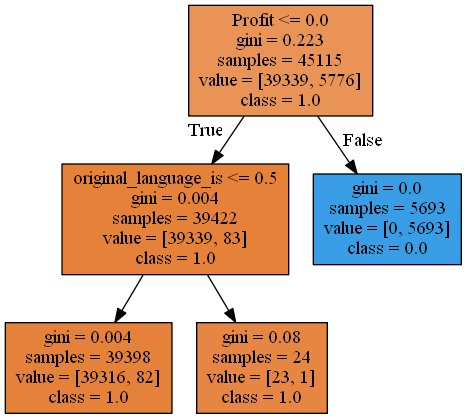

In [78]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Takeaways

Looking at the tree, the question 'Profit <= 0' splits the data into two branches based on 0. If the movie was not profitable (i.e., 'Profit <= 0' is True), then the question 'original_language_is <= 0.5' splits the data into two branches based on 0.5. Since original_language is a dummy variable, if this condition is true then the original language is not affecting whether or not the movie is profitable. 

# Building Machine Learning Models

In [91]:
from sklearn.model_selection import train_test_split
X = df2.drop('Profit1',axis=1)
Y = df2['Profit1']
X.shape,Y.shape

((45115, 108), (45115,))

#### Split the data into 70% training and 30% test

In [95]:
train_test_split(X,Y,test_size=0.3,random_state = 0)

[         budget  popularity   revenue  runtime  vote_average  vote_count  \
 37735  0.000000    0.219358  0.000000     94.0           4.0         2.0   
 31     0.077632   12.297305  0.444316    129.0           7.4      2470.0   
 36376  0.000000    0.397274  0.000000    100.0           7.0         2.0   
 1803   0.126316    7.349812  0.204594    123.0           6.5       338.0   
 27594  0.000000    1.028416  0.000000     90.0           1.4         4.0   
 ...         ...         ...       ...      ...           ...         ...   
 30529  0.000000    0.008267  0.000000     90.0           6.2         5.0   
 21299  0.000000    4.772990  0.000000    112.0           5.5        15.0   
 42896  0.255263   72.884078  0.611527    122.0           5.7      2677.0   
 43870  0.000000    0.691680  0.000000     90.0           4.4         5.0   
 2741   0.000000   14.950187  0.000000     90.0           7.1       114.0   
 
          Profit  weighted_rating  adult_False  adult_True  ...  \
 37735 

In [96]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size=0.3,random_state = 0)

In [97]:
len(X_train)/len(X)

0.6999889172115704

In [98]:
len(X_test)/len(X)

0.3000110827884296

#### This should equal to the length of data frame as we don't want to leave anything out

In [99]:
(len(X_train) + len(X_test)) == len(X)

True

### Random forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [102]:
len(X_train)

31580

In [103]:
len(X_test)

13535

In [104]:
len(Y_train)

31580

#### Predict on the dataset

In [105]:
cl.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [106]:
(cl.predict(X_test) == Y_test).mean()

0.9985223494643517

In [107]:
y_pred = cl.predict(X_test)

In [108]:
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [109]:
y_pred_proba = cl.predict_proba(X_test)[:,1]

In [110]:
y_pred_proba[:20]

array([0.00000000e+00, 2.03174660e-04, 0.00000000e+00, 6.54020776e-04,
       7.80759195e-04, 0.00000000e+00, 2.22765824e-04, 4.84094053e-05,
       2.00000000e-02, 6.00000000e-02, 7.61794343e-04, 1.85080774e-04,
       0.00000000e+00, 7.22222041e-04, 9.39455318e-04, 4.84094053e-05,
       1.39520350e-04, 9.20000000e-01, 0.00000000e+00, 3.62671283e-04])

#### Confusion Matrix

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
import sklearn.metrics as met

In [113]:
confusion_matrix(Y_test,y_pred)

array([[11783,     0],
       [   20,  1732]], dtype=int64)

#### Accuracy

In [114]:
(y_pred == Y_test).mean()

0.9985223494643517

In [115]:
met.accuracy_score(Y_test, y_pred)

0.9985223494643517

#### Precision Score

In [116]:
met.precision_score(Y_test,y_pred)

1.0

#### AUC score

In [117]:
met.roc_auc_score(Y_test,y_pred_proba)

0.9960642450988711

#### Decision Regression Tree

In [119]:
import sklearn.tree

In [124]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth = 2)

In [125]:
dt.fit(X,Y)

DecisionTreeRegressor(max_depth=2)

In [126]:
Y.mean()

0.1280283719383797

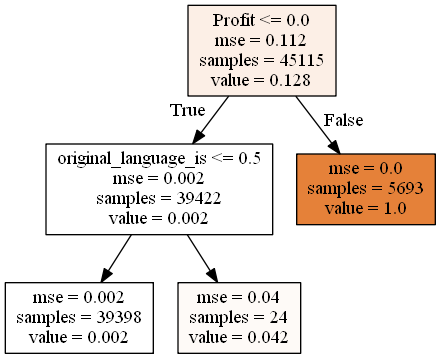

In [128]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Clustering


In [110]:
from sklearn.cluster import KMeans

#### Fit K-Means clustering for k=3


In [111]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)

KMeans(n_clusters=3)

#### As a result of clustering, we have the clustering label. Let's put these labels back into the original numeric data frame.

In [112]:
len(kmeans.labels_)

45115

### Getting summary information on the clusters' characteristics

In [113]:
df2['cluster'] = kmeans.labels_

In [114]:
df2.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,Profit,weighted_rating,Profit1,adult_False,...,original_language_zu,original_language_nan,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored,status_nan,cluster
0,0.078947,21.946943,0.983037,81.0,7.7,5415.0,0.904090,7.545556,1.0,1,...,0,0,0,0,0,0,1,0,0,1
1,0.171053,17.015539,0.691572,104.0,6.9,2413.0,0.520519,6.704671,1.0,1,...,0,0,0,0,0,0,1,0,0,2
2,0.000000,11.712900,0.000000,101.0,6.5,92.0,0.000000,5.773818,0.0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.042105,3.859495,0.214348,127.0,6.1,34.0,0.172243,5.654162,1.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.000000,8.387519,0.201523,106.0,5.7,173.0,0.201523,5.641615,1.0,1,...,0,0,0,0,0,0,1,0,0,0


<Figure size 864x504 with 0 Axes>

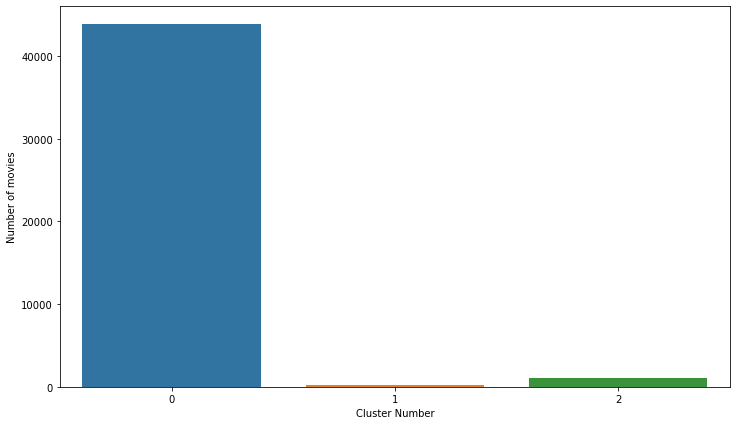

In [115]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,3,1),y=df2.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

#### We clearly see that one cluster is the largest and one cluster has the fewest number of movie

In [116]:
df2.groupby(['cluster']).mean()

,budget,popularity,revenue,runtime,vote_average,vote_count,Profit,weighted_rating,Profit1,adult_False,...,original_language_zh,original_language_zu,original_language_nan,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored,status_nan
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.006451,2.510285,0.010748,93.557052,5.599872,45.558489,0.004297,5.661627,0.103880,0.999795,...,0.009311,0.000023,0.0,0.000046,0.000411,0.000342,0.002236,0.991739,0.005226,0.0
1,0.299835,36.515962,1.538087,127.492754,7.291787,5624.811594,1.238251,7.165625,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
2,0.147628,13.947426,0.506999,112.851103,6.637592,1685.854779,0.359371,6.413647,0.934743,1.000000,...,0.000919,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0


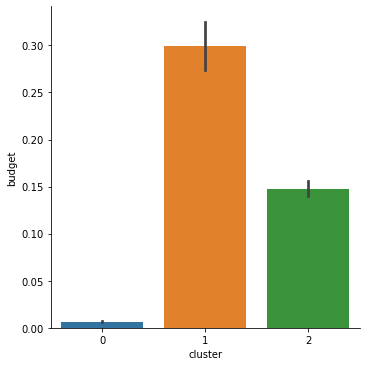

In [117]:
sns.catplot(x='cluster',y='budget',data=df2, kind='bar')

In [118]:
size = list(df2.groupby(['cluster']).count()['budget'].values)

In [119]:
df2[df2['cluster']==size.index(sorted(size)[0])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,Profit,weighted_rating,Profit1,adult_False,...,original_language_zu,original_language_nan,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored,status_nan,cluster
19109,0.131579,19.638605,1.445706,106.0,6.3,4811.0,1.314127,6.243595,1.0,1,...,0,0,0,0,0,0,1,0,0,1
36247,0.394737,26.024868,2.694169,108.0,7.7,4961.0,2.299432,7.532562,1.0,1,...,0,0,0,0,0,0,1,0,0,1
14416,0.526316,16.698628,2.025404,158.0,5.6,4994.0,1.499088,5.601456,1.0,1,...,0,0,0,0,0,0,1,0,0,1
16974,0.394737,29.158489,1.182438,115.0,6.6,6678.0,0.787702,6.540096,1.0,1,...,0,0,0,0,0,0,1,0,0,1
30311,0.460526,23.985587,2.256872,94.0,7.9,6737.0,1.796345,7.761922,1.0,1,...,0,0,0,0,0,0,1,0,0,1


#### This cluster represents the movies that recieved least number of votes and also has the smallest runtime, revenue and popularity score.

### Regression for Prediction

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                            test_size=0.3,random_state=0)

In [122]:
from sklearn import linear_model
regLasso = linear_model.Lasso()

In [123]:
regLasso.fit(X_train,Y_train)

Lasso()

In [124]:
y_pred = regLasso.predict(X_test)

In [125]:
y_pred

array([-0.00411986, -0.00476933, -0.00260441, ..., -0.00433635,
       -0.00541881, -0.00541881])

### Mean absolute error / Mean Absolute Deviation (MAD)

#### The average of the absolute values of the errors

In [126]:
y_pred

array([-0.00411986, -0.00476933, -0.00260441, ..., -0.00433635,
       -0.00541881, -0.00541881])

#### Mean absolute error / MAD

In [127]:
(y_pred - Y_test).abs().mean()

0.021955542209303507

#### Mean squared error / MSE

#### The average of the errors squared

In [128]:
((y_pred - Y_test)**2).mean()

0.006761653275323037